# Демонстрационный ноутбук к статье "Поиск печатей в документах"

***Вспомогательные действия***

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
def T(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

## Шаг 1

In [3]:
import cv2
import numpy as np

## Шаг 2

In [4]:
im = cv2.imread('license.jpg')

***Вспомогательные действия***

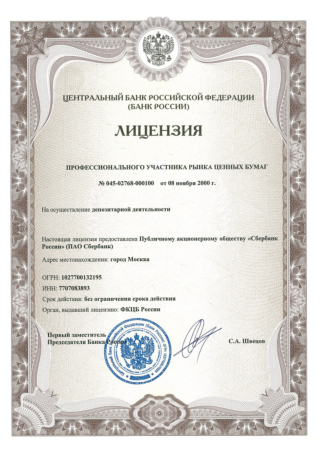

In [5]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(im))

### Шаг 3

In [6]:
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
blue_lower = np.array([80, 30, 30])
blue_higher = np.array([140, 250, 250])
mask = cv2.inRange(hsv, blue_lower, blue_higher)
selection = cv2.bitwise_and(im, im, mask=mask)

***Вспомогательные действия***

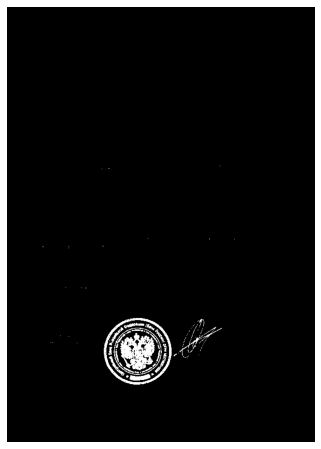

In [7]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(mask))

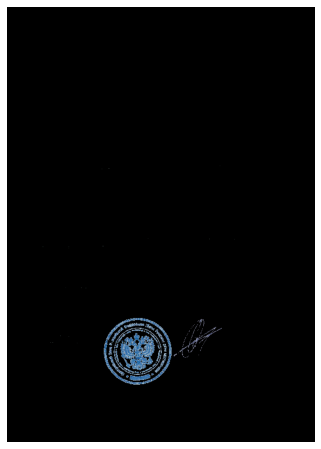

In [8]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(selection))

In [9]:
cv2.imwrite('license_selection.jpg', selection)

True

### Шаг 4

In [10]:
gray = cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 2)

***Вспомогательные действия***

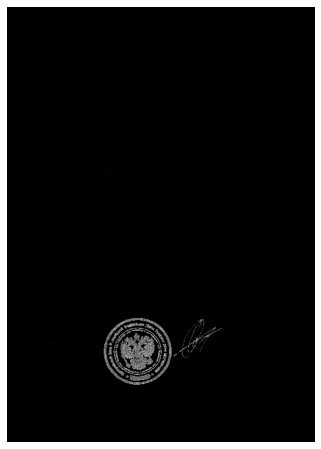

In [11]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(gray))

### Шаг 5

In [12]:
h, w = gray.shape
r_min = int(w * 0.15 / 2)
r_max = int(w * 0.30 / 2)
contours = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1, minDist=2 * r_min)

***Вспомогательные действия***

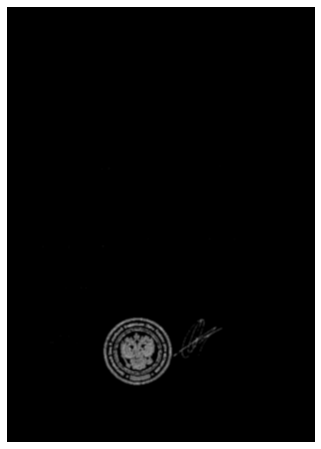

In [13]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(blur))

### Шаг 6

In [14]:
boxes = []

if contours is not None:
    for contour in contours[0]:
        xc, yc, r = np.uint16(np.around(contour))
        if r_min <= r <= r_max:
            x1 = xc - r
            y1 = yc - r
            x2 = xc + r
            y2 = yc + r
            boxes.append([x1, y1, x2, y2])

***Вспомогательные действия***

In [15]:
contours

array([[[252.5, 665.5,  59.8]]], dtype=float32)

In [16]:
boxes

[[192, 606, 312, 726]]

In [17]:
im_boxes = im.copy()
for box in boxes:
    cv2.rectangle(im_boxes, (box[0],box[1]), (box[2],box[3]), (0, 0, 255), 5)

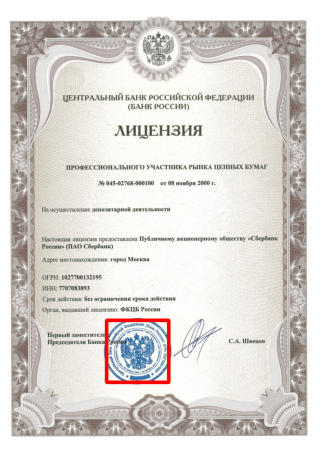

In [18]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(im_boxes))

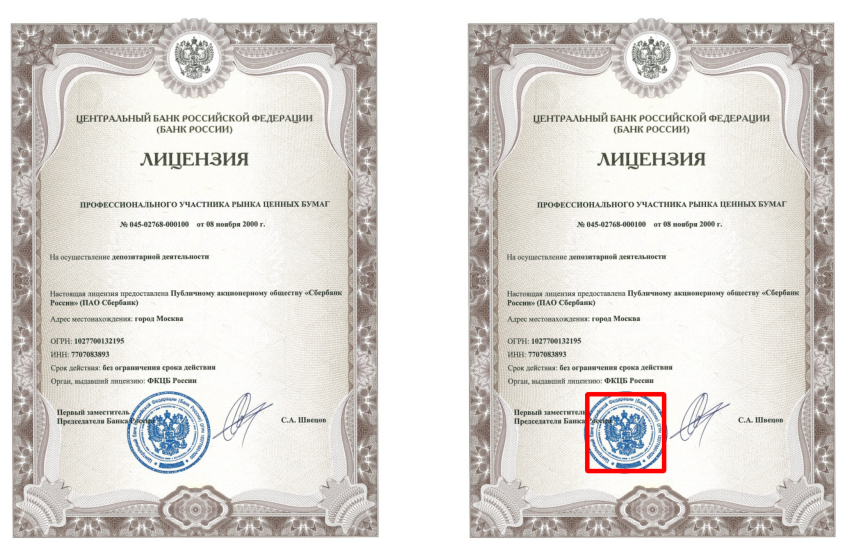

In [19]:
f, axarr = plt.subplots(1,2)
axarr[0].axis('off')
axarr[1].axis('off')

f.set_figheight(15)
f.set_figwidth(15)

axarr[0].imshow(T(im))
axarr[1].imshow(T(im_boxes))

plt.savefig('license_src_dst.png')